# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Halim Sajidi
- Email: halimsajidi14@gmail.com
- Id Dicoding: halimsajidi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# evaluasi model
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score

# deploy
from joblib import dump, load


### Menyiapkan data yang akan digunankan

In [4]:
df = pd.read_csv('employee_data.csv')
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


## Data Understanding

### Deskripsi Variabel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Kolom kategorik**

In [7]:
df_cat = df.select_dtypes(include="object")
cat_col = df_cat.columns
df_cat.head(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Frequently,Human Resources,Other,Male,Human Resources,Married,Y,Yes
1,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,Y,No
2,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,Yes
3,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,Y,No
4,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Married,Y,No


**Kolom Numerik**

In [8]:
df_num = df.select_dtypes(include=["int64", "float64"])
num_col = df_num.columns
df_num.head()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,1444,1,4,1,4,88,3,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,1141,11,2,1,1,61,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,1323,4,4,1,1,34,3,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,555,26,3,1,3,77,3,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,1194,2,4,1,3,98,3,...,2,80,3,20,2,3,5,3,0,2


### Menangani Missing Value

In [9]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Kolom Attrition akan digunakan sebagai kolom target, sehingga untuk missing value tidak lakukan imput data atau menggantinya dengan mode, tetapi saya lakukan drop nilai NaN agar tidak terjadi kelasalahan persepsi di akhirnya.

In [10]:
df_clean = df.dropna(subset=['Attrition'])

In [11]:
df_clean

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,1,80,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


Hasil akhirnya dataset menjadi 1058 rows × 35 columns

### Menangani Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

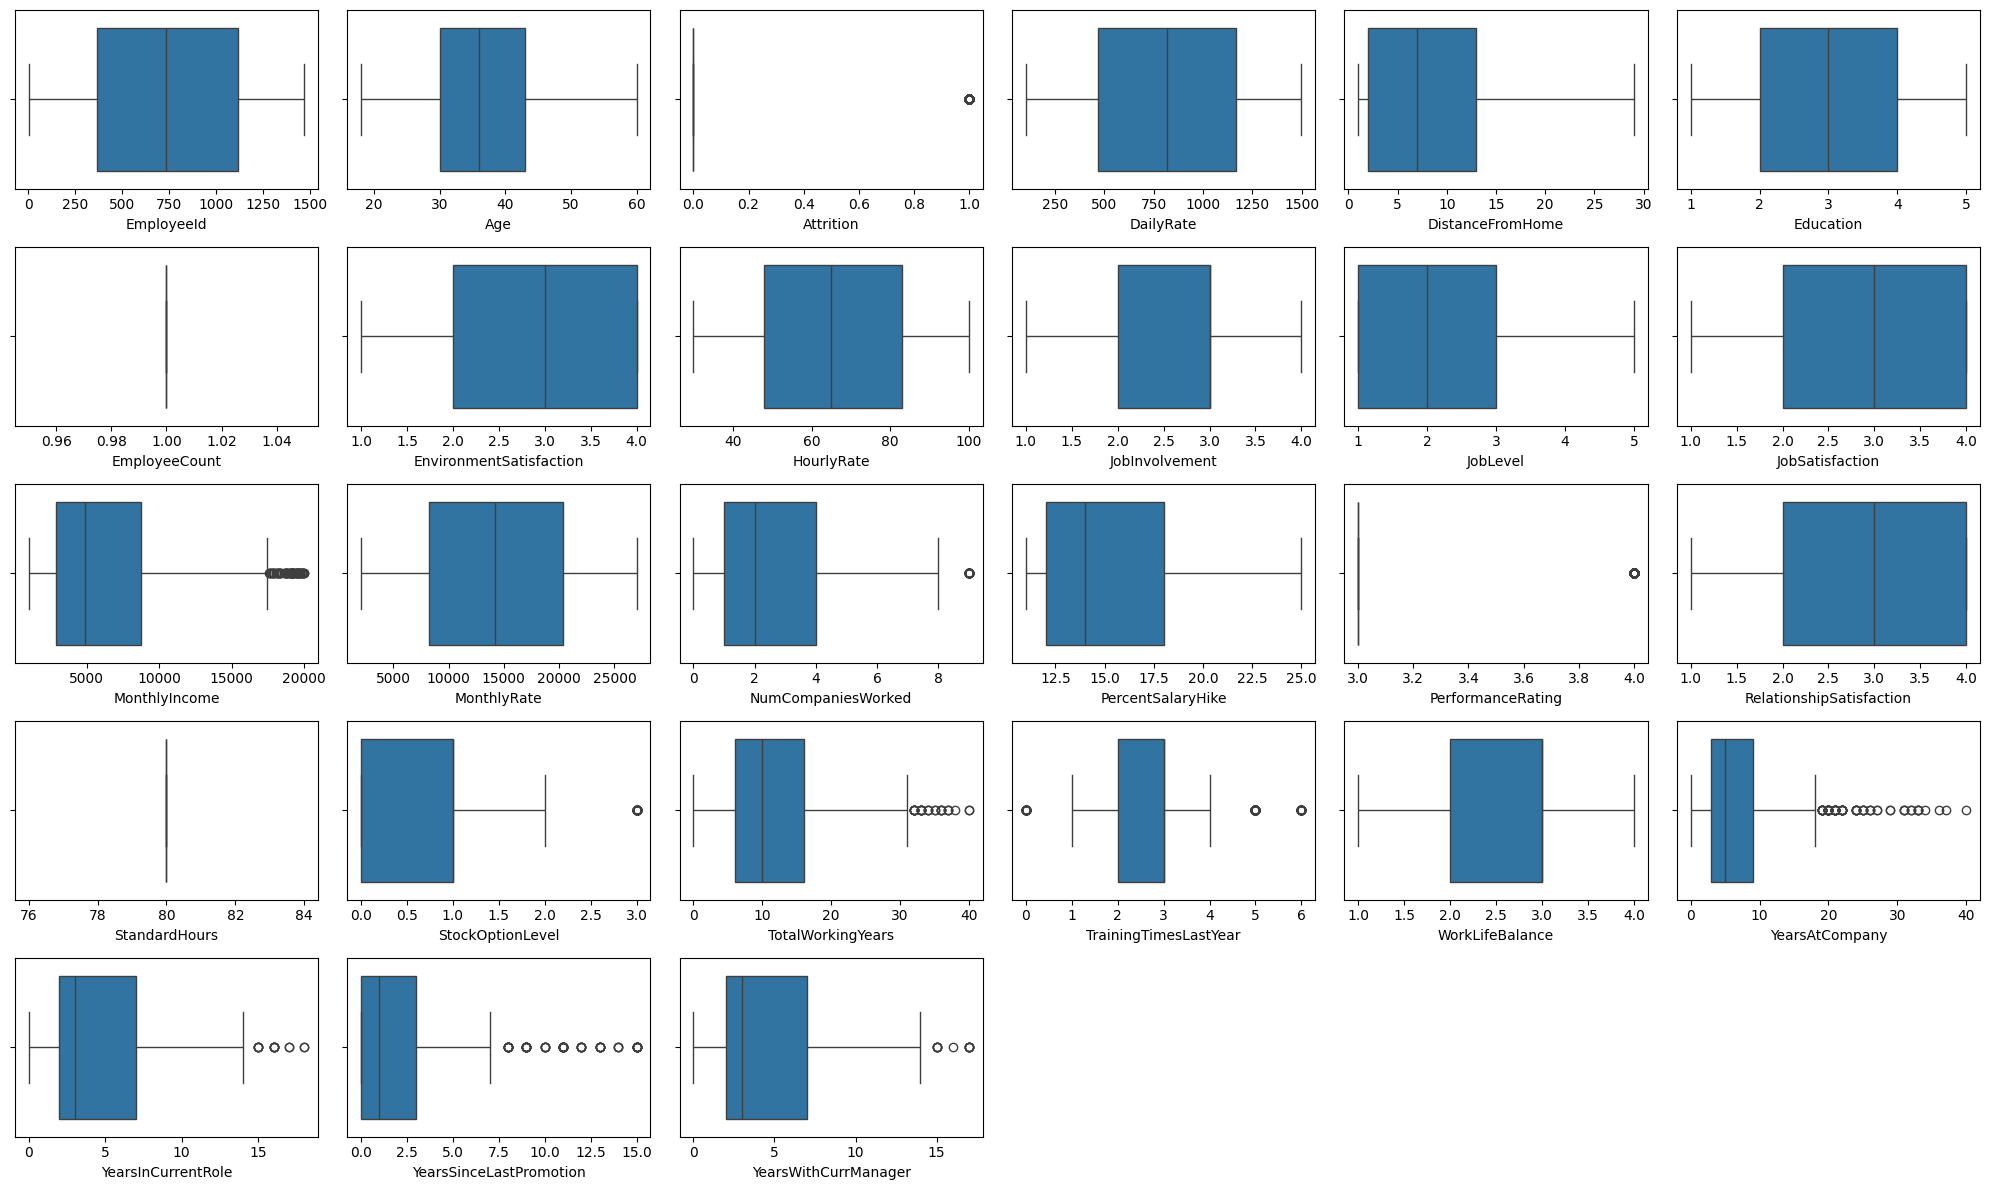

In [12]:
plt.figure(figsize=(20, 12))

# Calculate the number of rows and columns needed for the subplots
num_rows = 5
num_cols = 6

for i, column in enumerate(num_col, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df_clean, x=df_clean[column])
    plt.tight_layout()

Berdasarkan visualisasi di atas, terlihat adanya outlier pada beberapa kolom, yaitu **MonthlyIncome**, **NumCompaniesWorked**, **StockOptionLevel**, **TotalWorkingYears**, **TrainingTimesLastYear**, **YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion**, dan **YearsWithCurrManager**.

Namun, mengetahui keberadaan outlier tidak serta-merta berarti outlier tersebut harus dihapus atau diganti. Setiap data pada kolom tersebut dianggap masuk akal dan sesuai dengan konteksnya, sehingga tidak perlu dilakukan perubahan terhadap outlier tersebut.

In [13]:
Q1 = df_clean['TotalWorkingYears'].quantile(0.25)
Q3 = df_clean['TotalWorkingYears'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan upper bound
upper_bound = Q3 + 1.5 * IQR

# Menampilkan data yang lebih dari upper whiskers (outliers)
outliers = df_clean[df_clean['TotalWorkingYears'] > upper_bound]

outliers['Age > TotalWorkingYears'] = outliers['Age'] > outliers['TotalWorkingYears']

# Cetak outliers
outliers[['Age','TotalWorkingYears','Age > TotalWorkingYears']].head()


<ipython-input-13-eea51e2c629d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Age > TotalWorkingYears'] = outliers['Age'] > outliers['TotalWorkingYears']


,Age,TotalWorkingYears,Age > TotalWorkingYears
120,52,33,True
209,58,32,True
229,53,35,True
249,60,33,True
264,50,32,True


In [14]:
outliers['Age > TotalWorkingYears'].unique()

array([ True])

Berdasarkan tabel di atas, terdapat 63 outlier pada kolom **TotalWorkingYears**. Namun, jika dibandingkan dengan kolom **Age**, semua outlier menunjukkan bahwa usia pengguna lebih besar dari jumlah **TotalWorkingYears**, sehingga data tersebut valid. Oleh karena itu, outlier ini tidak perlu dihapus atau diganti, karena nilai yang tercatat masih masuk akal dan sesuai dengan konteks datanya.

### menyimpan dataset

In [15]:
df_clean.to_csv('cleaned_employee_data.csv', index=False)

### Distribusi Attrition

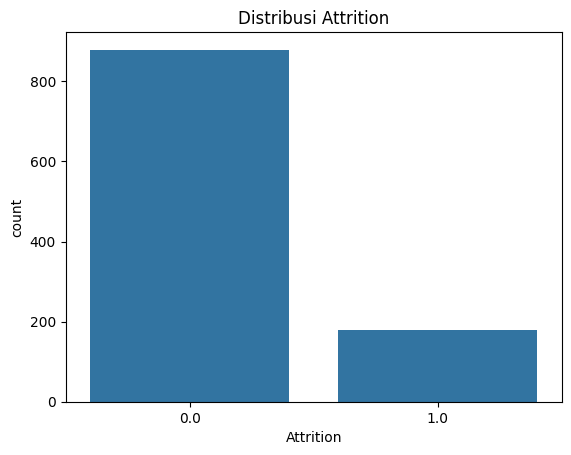

In [16]:
# Visualisasi distribusi Attrition
sns.countplot(x='Attrition', data=df_clean)
plt.title('Distribusi Attrition')
plt.show()

Berdasarkan grafik di atas menunjukkan bahwa proporsi karyawan yang meninggalkan perusahaan jauh lebih sedikit dibandingkan yang tetap tinggal.

### Attrition berdasarkan Usia (Age)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


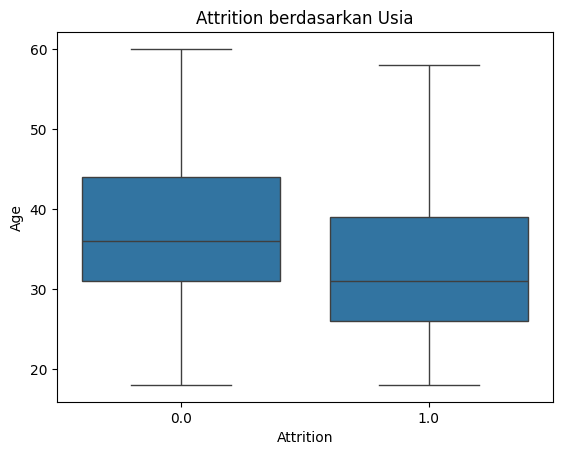

In [17]:
# Visualisasi attrition berdasarkan usia
sns.boxplot(x='Attrition', y='Age', data=df_clean)
plt.title('Attrition berdasarkan Usia')
plt.show()


Dapat dilihat karyawan yang berumur lebih 30 sampai 40 tahun-an cenderung tetap tinggal di tempat kerja, dibandingkan dengan karyawan yang berumur dibawah 40 tahun sampai 20 tahun-an.

### Attrition berdasarkan Penghasilan Bulanan (MonthlyIncome)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


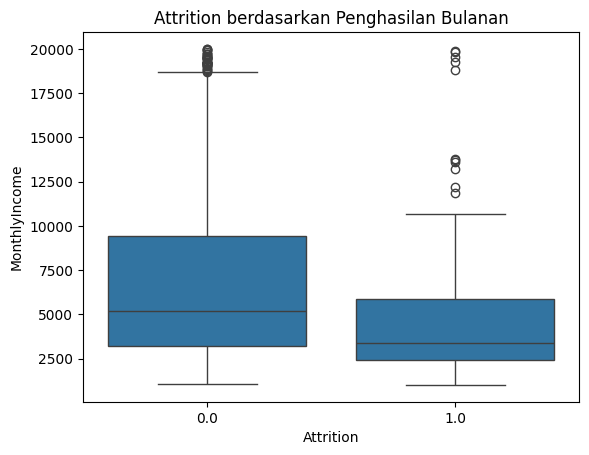

In [18]:
# Visualisasi attrition berdasarkan penghasilan bulanan
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean)
plt.title('Attrition berdasarkan Penghasilan Bulanan')
plt.show()

Pengaruh penghasilan bulanan dapat dilihat pada grafik di atas, karyawan yang memiliki penghasilan bulanan lebih besar cenderung lebih memilih tinggal dibandingkan dengan karyawan yang memliki penghasilan bulanan lebih rendah.

### Attrition vs Overtime

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


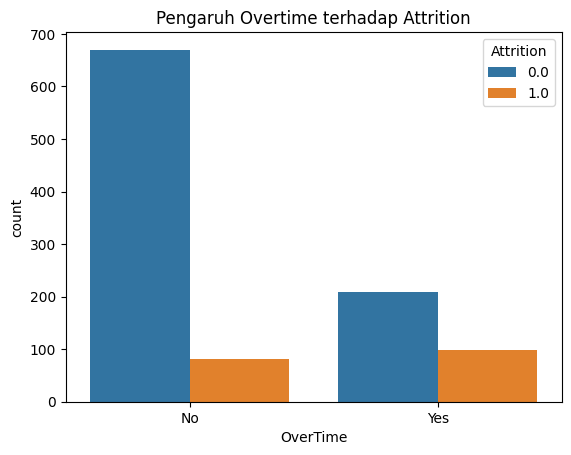

In [19]:
# Visualisasi Attrition vs Overtime
sns.countplot(x='OverTime', hue='Attrition', data=df_clean)
plt.title('Pengaruh Overtime terhadap Attrition')
plt.show()

Grafik di atas menunjukkan bahwa karyawan yang sering bekerja lembur lebih cenderung resign dibandingkan yang tidak.

### Work-Life Balance dan Attrition

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


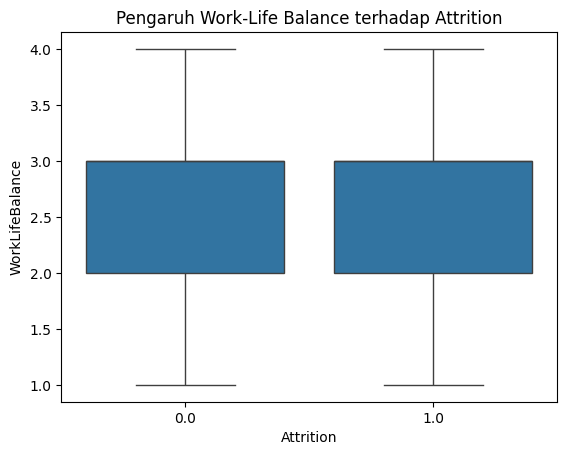

In [20]:
# Visualisasi Work-Life Balance vs Attrition
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=df_clean)
plt.title('Pengaruh Work-Life Balance terhadap Attrition')
plt.show()

Berdasarkan grafik dia atas, Work-Life Balance tidak menjadi alasan karyaman melakukan resign

### YearsAtCompany dan Attrition

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


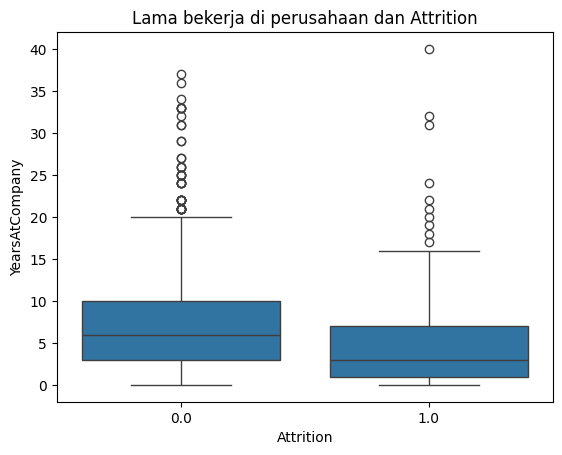

In [21]:
# Visualisasi YearsAtCompany vs Attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df_clean)
plt.title('Lama bekerja di perusahaan dan Attrition')
plt.show()

Karyawan yang lebih lama bekerja di perusahaan cenderung lebih memlih untuk tetap tinggal dibandingkan dengan karyawan yang belum lama bekerja, walapun dapat dilihat pada grafik terdapat karyawan yang memutuskan resign walaupun sudah lama bekerja.

### Attrition berdasarkan Status Pernikahan (MaritalStatus)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


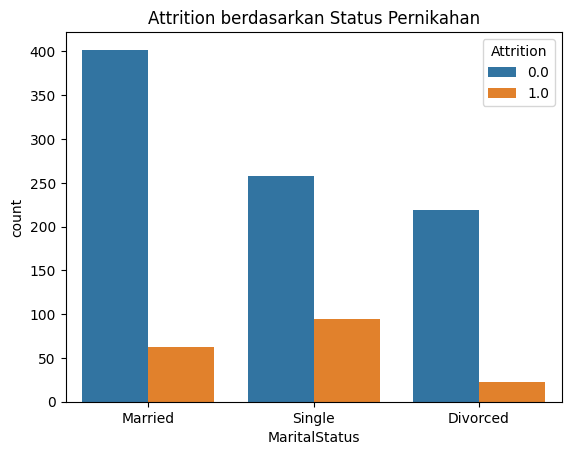

In [22]:
# Visualisasi Attrition berdasarkan Marital Status
sns.countplot(x='MaritalStatus', hue='Attrition', data=df_clean)
plt.title('Attrition berdasarkan Status Pernikahan')
plt.show()


Berdasarkan grafik di atas, menikah menjadi salah satu alasan mengapa karyawan tidak melakukan resign dan tetap tinggal di perusahaannya.

## Data Preparation / Preprocessing

### Encoding

Pada tahap ini dilakukan encoding menggunakan label encoder, bertujuan agar data dapat diproses pada saat pengembangan model machine learning.

In [23]:
le = LabelEncoder()

for column in cat_col:
    df_clean[column] = le.fit_transform(df_clean[column])

df_clean

<ipython-input-23-79947c0d1264>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = le.fit_transform(df_clean[column])
<ipython-input-23-79947c0d1264>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = le.fit_transform(df_clean[column])
<ipython-input-23-79947c0d1264>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,2,1141,1,11,2,3,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,2,1124,2,1,2,3,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,2,725,1,2,3,3,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,0,1366,1,24,2,5,1,...,1,80,0,10,2,2,10,7,1,9
1465,1466,38,0.0,2,168,1,1,3,1,1,...,4,80,0,10,4,4,1,0,0,0
1467,1468,28,1.0,2,1485,1,12,1,1,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,0,458,1,16,2,1,1,...,2,80,1,6,0,3,4,2,0,0


### splitting data

Pembagian data dilakukan agar mendapatkan dataset train dan juga test dengan proporsi 80% dan 20%

In [24]:
X = df_clean.drop(columns=['EmployeeId','Attrition'])
y = df_clean['Attrition']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train', X_train.shape)  #Printing the X_train Features Shape
print('y_train', y_train.shape)  #Printing the y_train Labels Shape
print('X_test', X_test.shape)    #Printing the X_test Features Shape
print('y_test', y_test.shape)    #Printing the y_test Labels  Shape

X_train (846, 33)
y_train (846,)
X_test (212, 33)
y_test (212,)


## Modeling

Tahap ini dilakukan pengembangan model machine learning dengan tujuan untuk memprediksi karyawan yang tetap tinggal di perusahaan atau melakukan resign.

Setiap baseline model yang dikembangkan, diberikan random_state. random_state digunakan sebagai pengontrol pengacakan yang diterapkan pada data sebelum melakukan pemisahan.

### Logistic Regression

**Keunggulan:**
- Sederhana dan mudah diinterpretasikan
- Kecepatan dan efisiensi
- Multicollinearity Handling: Dapat menangani multicollinearity menggunakan regularization (L1 atau L2).

**Kekurangan:**
- Kinerja terbatas pada masalah kompleks
- Kurang efektif untuk outlier

In [ ]:
# melakukan training model
lr = LogisticRegression(random_state=24)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=24)

In [ ]:
# Predicting the X_test
pred = lr.predict(X_test)

# Testing the model accuracy with different parameters
acc = accuracy_score(y_test, pred)  # Getting the Accuracy Score
f1 = f1_score(y_test, pred, average='macro')  # Getting the F1 Score for multiclass
rec = recall_score(y_test, pred, average='macro')  # Getting the Recall Score for multiclass
prec = precision_score(y_test, pred, average='macro')  # Getting the Precision Score for multiclass
cm_lr = confusion_matrix(y_test, pred)  # Getting the confusion Matrix

# Defining a DataFrame
results = pd.DataFrame([['LogisticRegression', acc, f1, rec, prec]],
                           columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.820755,0.497881,0.522751,0.744817


### Random Forest

**Keunggulan:**
- Dapat menangani data non-linear: Random Forest dapat menangani hubungan kompleks antar fitur tanpa perlu membuat asumsi linearitas.
-Overfitting Resistance: Dengan menggabungkan banyak decision tree, Random Forest cenderung tidak overfitting.
- Fitur penting: Random Forest menyediakan cara untuk mengevaluasi fitur mana yang paling berpengaruh melalui feature importance.

**Kekurangan:**
- Waktu komputasi: Lebih lambat untuk dilatih dibandingkan model yang lebih sederhana, terutama pada dataset yang besar.
- Kurang interpretasi: Meskipun memberikan hasil yang baik, interpretasi model ini sulit dibandingkan model linear.

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Membuat prediksi pada X_test
pred = rf.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  # Menghitung Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Menghitung F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Menghitung Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Menghitung Precision (multiclass)
cm_rf = confusion_matrix(y_test, pred)  # Menghitung Confusion Matrix

# Menyimpan hasil evaluasi dalam DataFrame
model_results = pd.DataFrame([['Random Forest', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Menggabungkan hasil evaluasi ke dalam DataFrame `results`
results = pd.concat([results, model_results], ignore_index=True)

# Menampilkan hasil
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.820755,0.497881,0.522751,0.744817
1,Random Forest,0.849057,0.609846,0.589744,0.921951
2,SVM,0.816038,0.449351,0.500000,0.408019
3,XGBoost,0.839623,0.660448,0.633615,0.745841
4,Random Forest,0.839623,0.568900,0.564103,0.917874


###  Support Vector Machine (SVM)

**Keunggulan:**
- Kinerja tinggi pada data kecil: SVM sering bekerja dengan sangat baik untuk dataset dengan ukuran kecil hingga menengah.
- Mengatasi masalah non-linear: Kernel trick memungkinkan SVM untuk mengatasi masalah klasifikasi non-linear.
- Overfitting minimal: Karena SVM memaksimalkan margin antara kelas, model ini cenderung menghindari overfitting, terutama pada data dengan high dimensionality.

**Kekurangan:**
- Lambat pada dataset besar: Waktu komputasi dan kebutuhan memori meningkat pesat seiring dengan ukuran dataset.
- Pemilihan kernel: Memilih kernel yang tepat (linear, polynomial, RBF, dsb.) bisa menjadi tantangan dan memerlukan banyak eksperimen.

In [ ]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Making predictions on X_test
pred = svm.predict(X_test)

# Calculating evaluation metrics
acc = accuracy_score(y_test, pred)  # Calculating Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Calculating F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Calculating Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Calculating Precision (multiclass)
cm_svm = confusion_matrix(y_test, pred)  # Calculating Confusion Matrix

# Storing evaluation results in a DataFrame
model_results = pd.DataFrame([['SVM', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Combining evaluation results into the `results` DataFrame
results = pd.concat([results, model_results], ignore_index=True)

# Displaying the results
results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.820755,0.497881,0.522751,0.744817
1,Random Forest,0.849057,0.609846,0.589744,0.921951
2,SVM,0.816038,0.449351,0.500000,0.408019


### XGBoost

**Keunggulan:**
- Kinerja tinggi: Sangat efektif dalam menghasilkan hasil yang baik pada data yang kompleks. Model ini sering kali menghasilkan akurasi lebih tinggi dibandingkan metode lain.
- Flexibilitas: Mendukung banyak fungsi loss dan dapat digunakan untuk masalah klasifikasi, regresi, dan ranking.
- Regularisasi: Gradient boosting (seperti XGBoost) memiliki mekanisme regularisasi bawaan yang membantu mencegah overfitting.

**Kekurangan:**
- Waktu pelatihan: Membutuhkan waktu pelatihan yang lebih lama, terutama pada dataset yang besar.
- Overfitting: Jika tidak dikontrol dengan baik, model ini bisa rentan terhadap overfitting, terutama pada data kecil.

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Membuat prediksi pada X_test
pred = xgb.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  # Menghitung Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Menghitung F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Menghitung Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Menghitung Precision (multiclass)
cm_xgb = confusion_matrix(y_test, pred)  # Menghitung Confusion Matrix

# Menyimpan hasil evaluasi dalam DataFrame
model_results = pd.DataFrame([['XGBoost', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Menggabungkan hasil evaluasi ke dalam DataFrame `results`
results = pd.concat([results, model_results], ignore_index=True)

# Menampilkan hasil
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.820755,0.497881,0.522751,0.744817
1,Random Forest,0.849057,0.609846,0.589744,0.921951
2,SVM,0.816038,0.449351,0.500000,0.408019
3,XGBoost,0.839623,0.660448,0.633615,0.745841


## Evaluation

Metrik yang digunakan untuk mengevaluasi model adalah Akurasi, Precision, Recall, dan F1-Score. Metrik ini dipilih karena sesuai dengan kebutuhan yaitu klasifikasi.

In [ ]:
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.820755,0.497881,0.522751,0.744817
1,Random Forest,0.849057,0.609846,0.589744,0.921951
2,SVM,0.816038,0.449351,0.500000,0.408019
3,XGBoost,0.839623,0.660448,0.633615,0.745841


Dapat dilihat setelah dilakukan pengembangan model machine learning, didapatkan model terbaik yaitu Random Forest dengan akurasi 84.9%

## Deployment

Model yang sudah dibuat selanjutnya adalah menyimpanan yang mana tahap ini dilakukan, agar model yang sudah dibuat bisa digunakan kembali.

In [27]:
# Menyimpan model ke file
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

## menyimpan dataset dan requirement

In [28]:
df_clean.to_csv('employee_data_for_machinelearing.csv', index=False)

In [29]:
pip freeze > requirements.txt